In [1]:
include("../path.jl")
include("../ToolBox/ToolBox.jl")
using .ToolBox
using .Geometry

In [2]:
master_view = [500:4500,1000:10000]

2-element Array{UnitRange{Int64},1}:
 500:4500  
 1000:10000

In [3]:
# load meta and pod
master_meta = Load.slc_meta(master_meta_path);
master_precise_orbit = Load.precise_orbit(master_pod_path,master_meta["t_0"]);
slave_meta = Load.slc_meta(slave_meta_path);
slave_precise_orbit = Load.precise_orbit(slave_pod_path,slave_meta["t_0"]);

In [4]:
meta = (master_meta,slave_meta)
precise_orbit = (master_precise_orbit,slave_precise_orbit);

In [5]:
# load DEM
footprint = SlcUtil.footprint(master_meta, master_view)
latlon_window = ((minimum(footprint[1]),maximum(footprint[1])),(minimum(footprint[2]),maximum(footprint[2])))
dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[90,90]);

In [6]:
# compile 
slave_data,flat,lut = coregister_slave([500:600,1000:1100],slave_data_path,meta,precise_orbit,dem);

In [16]:
using Profile
Profile.clear()
Profile.init() # returns the current settings
Profile.init(n = 10^7, delay = 0.01)
@profile coregister_slave(master_view,slave_data_path,meta,precise_orbit,dem)

(Complex{Float64}[0.347991+12.163im -1.67531+0.399768im … 17.2718+2.73996im 30.3868+13.3201im; -21.4941+7.92813im -14.0655+6.19549im … 10.6748+17.4256im -7.05524+38.6375im; … ; -32.5118-19.4976im -13.4445+5.34943im … -2.61682+23.8039im 26.0505+10.0061im; -27.9855+20.5381im -14.162-4.59205im … 24.3516-33.6359im 10.5705-26.2729im], Complex{Float64}[-0.50897-0.860784im -0.491432-0.870916im … 0.962598+0.270934im 0.957554+0.288255im; -0.525844-0.850581im -0.50851-0.861056im … 0.967908+0.251304im 0.963217+0.268723im; … ; -0.687892+0.725813im -0.70273+0.711456im … 0.103994+0.994578im 0.0862708+0.996272im; -0.673721+0.738986im -0.688715+0.725032im … 0.124363+0.992237im 0.106678+0.994294im], Dict{String,Any}("master_sample"=>[1000, 1008, 1016, 1024, 1032, 1040, 1048, 1056, 1064, 1072  …  9928, 9936, 9944, 9952, 9960, 9968, 9976, 9984, 9992, 10000],"latitude"=>[56.6122, 56.612, 56.6118, 56.6115, 56.6113, 56.611, 56.6108, 56.6105, 56.6103, 56.61  …  56.2143, 56.2141, 56.2139, 56.2136, 56.2134, 56

In [18]:
Profile.print(maxdepth=13,mincount=68)

6865 ./task.jl:259; (::getfield(IJulia, Symbol("##15#...
 6865 ...cwvsj/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  6865 ./essentials.jl:696; invokelatest
   6865 ./essentials.jl:697; #invokelatest#1
    6864 ...c/execute_request.jl:67; execute_request(::ZMQ.Socket, :...
     6864 .../SoftGlobalScope.jl:218; softscope_include_string(::Modu...
      6864 ./boot.jl:319; eval
       6864 ./In[16]:5; top-level scope
        6864 ...file/src/Profile.jl:25; macro expansion
         6864 ...ox/src/Geometry.jl:44; coregister_slave(::Array{Unit...
          4849 ...x/src/Geometry.jl:53; coregister_slave(::Array{Uni...
           4849 ./none:0; (::getfield(Main.ToolBox.Geo...
            646  .../src/Geometry.jl:258; #look_up_table#7(::Tuple{I...
             646 ...x/src/Geometry.jl:344; to_line_sample
            515  .../src/Geometry.jl:259; #look_up_table#7(::Tuple{I...
             514 ...olBox/src/Misc.jl:41; interp
            1739 .../src/Geometry.jl:263; #look_up_table#7(::Tuple{I...


In [7]:
master_data = Load.slc_data(master_data_path,master_view);

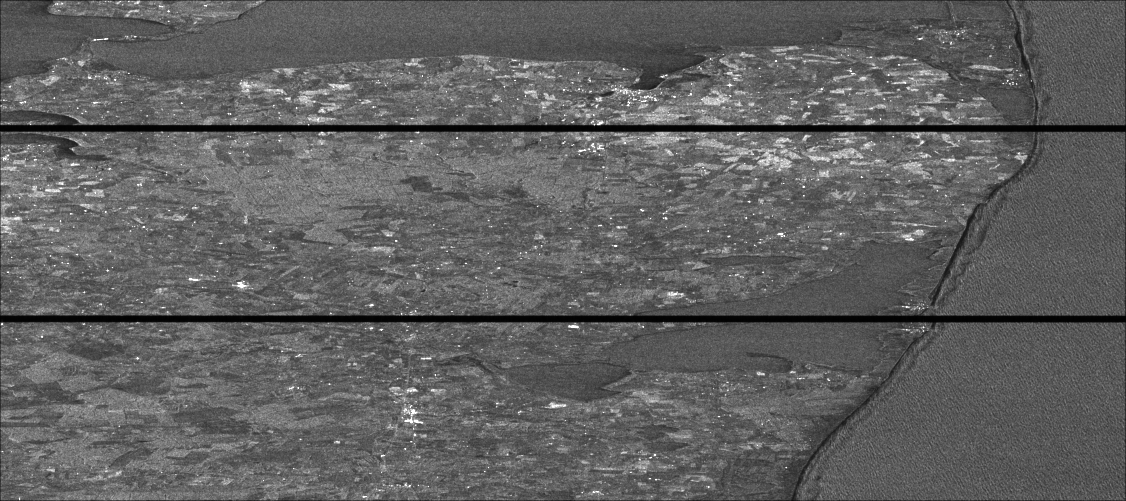

In [8]:
SlcUtil.show_img(master_data)

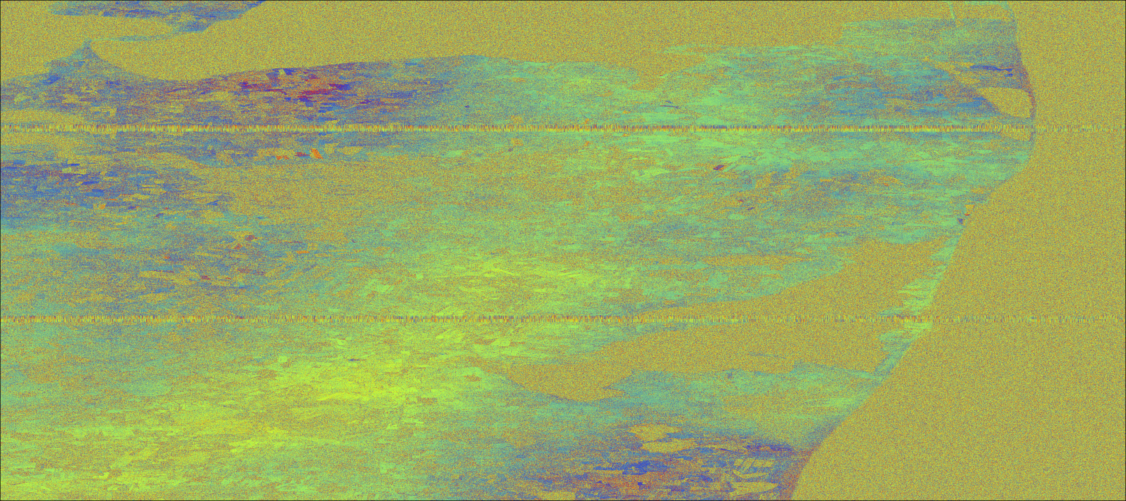

In [9]:
SlcUtil.plot_phase(master_data.* conj.(slave_data) .*flat)

In [10]:
SlcUtil._phase_colorbar()

 -π                 -π/2                 0                 π/2                 π


In [11]:
import FileIO
FileIO.save("infero_multi_burst.jpg", SlcUtil.plot_phase(master_data.* conj.(slave_data) .*flat))